## hlx lesson1 homework

In [3]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
cv2.__version__  # 查看版本

'3.4.2'

In [7]:
sift = cv2.xfeatures2d.SIFT_create() # 专利算法还有，方便后续学习

In [8]:
img_ori = cv2.imread('hlx2.jpg',1)  # 1彩图 0灰度图
img_ori.shape

(600, 468, 3)

In [9]:
cv2.imshow('hlxSoHandsome',img_ori)
key = cv2.waitKey(0)
if key == 27:   # 27Esc
    cv2.destroyAllWindows()   # 试验了下destroyWindow关闭时会异常，具体待查。

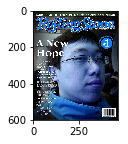

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(img_ori,cmap='gray')
plt.show()    # 灰度图是蓝的图，很奇怪！

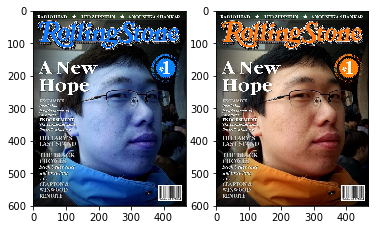

In [11]:
plt.subplot(121)
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
def my_show(img,size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()
    

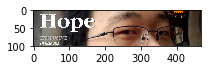

In [13]:
my_show(img_ori[100:400][100:200]) # 再听下lesson2开头讲的这个

## 图像通道分别处理

In [14]:
def img_cooler(img,b_increase,r_decrease):
    B,G,R = cv2.split(img)
    b_limit = 255 - b_increase
    B[B>b_limit]=255
    B[B<=b_limit]=(b_increase+B[B<=b_limit]).astype(img.dtype)
    
    r_limit = r_decrease
    R[R<r_decrease]=0
    R[R>=r_decrease]=(R[R>=r_decrease] - r_decrease).astype(img.dtype)
    return cv2.merge((B,G,R))

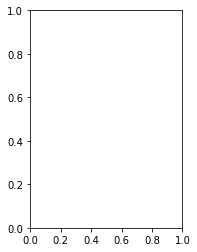

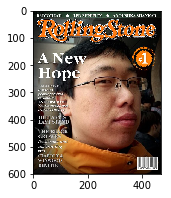

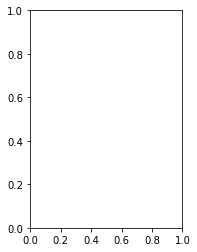

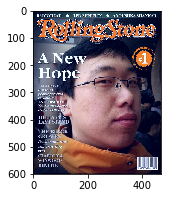

In [15]:
plt.subplot(121)
my_show(img_cooler(img_ori,0,0))
plt.subplot(122)                           #这里用子图显示有空图是为啥？
my_show(img_cooler(img_ori,30,10))

## Gamma Change

In [16]:
def adjust_gamma(img,gamma=1.0):    # 找下这个公式，再记忆下，gamma>1让图整体变亮，gamma<1，让图整体变黑
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img,table)

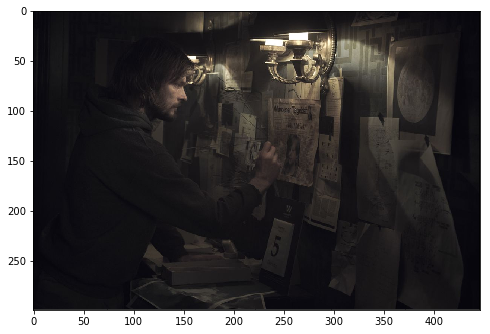

In [17]:
img_dark = cv2.imread('dark.jpg',1)
my_show(img_dark,size=(8,8))


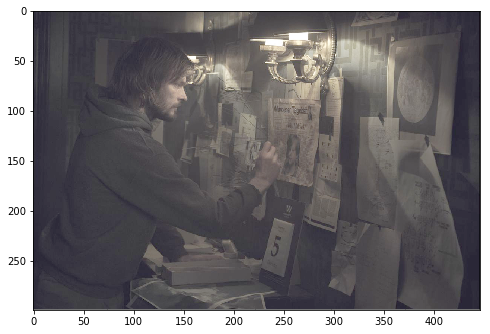

In [18]:
img_bright = adjust_gamma(img_dark,2)
my_show(img_bright,size=(8,8))

## 直方图均衡

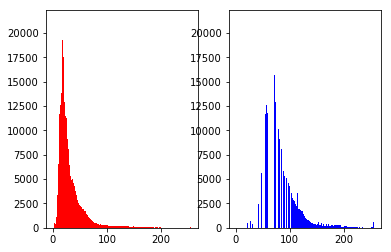

In [19]:
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(122)
plt.hist(img_bright.flatten(),256,[0,256],color='b')
plt.show()

## YUV色彩空间的Y进行直方图均衡来调亮图片

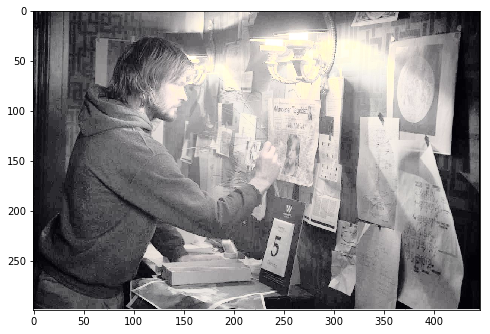

In [20]:
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])  # equlizeHist均衡直方图
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
my_show(img_output,size=(8,8))

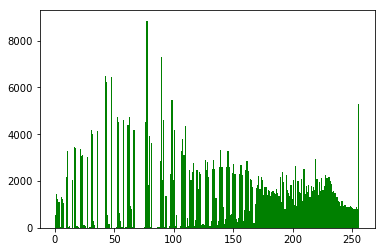

In [21]:
plt.hist(img_output.flatten(),256,[0,256],color='g')
plt.show()

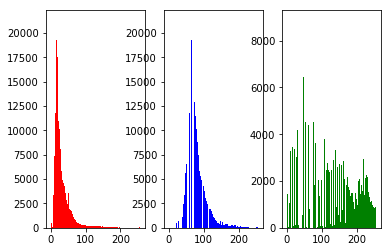

In [22]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_bright.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(img_output.flatten(),256,[0,256],color='g')
plt.show()

## transform 

In [23]:
def my_show2(img1,img2,size=(5,5)):
    plt.figure(figsize=size)
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
    plt.show()

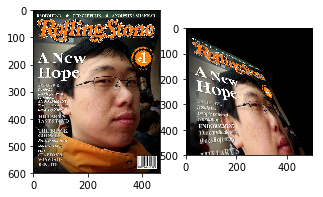

In [24]:
## perspective transform  投影变换
pts1 = np.float32([[0,0],[0,300],[300,300],[400,400]])
pts2 = np.float32([[10,20],[15,320],[310,350],[420,450]])
M = cv2.getPerspectiveTransform(pts1,pts2)  # 传说中的单应性矩阵
img_perspective = cv2.warpPerspective(img_ori,M,(500,500))
my_show2(img_ori,img_perspective)

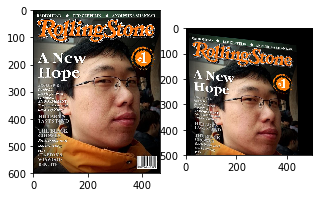

In [25]:
## AffineTransform 3个点，仿射变换      直线保持
pts1 = np.float32([[0,0],[0,300],[400,400]])
pts2 = np.float32([[10,20],[15,290],[380,420]])
M = cv2.getAffineTransform(pts1,pts2)  # 传说中的单应性矩阵
img_Affine = cv2.warpAffine(img_ori,M,(500,500))
my_show2(img_ori,img_Affine)

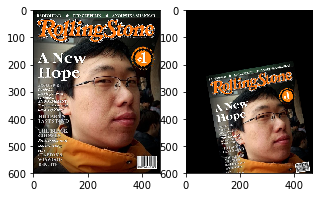

In [26]:
## rorateTransform 旋转/平移/scale，变换      直线保持
img = img_ori
M = cv2.getRotationMatrix2D((468,600),10,0.7)  # 前2参数:变换中心点坐标，后面是角度和scale
img_rotate = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))  # 后2参数，输出图的大小
my_show2(img_ori,img_rotate)

In [27]:
# rotation
img = img_ori
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[   0.8660254     0.5        -118.64994449]
 [  -0.5           0.8660254   157.19237886]]


In [29]:
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [31]:
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [32]:
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [42]:
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
print(M_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()


[[  7.88305686e-01  -2.51320173e-01   8.99550817e+01]
 [  2.87873163e-02   7.75711064e-01  -1.42579417e+01]
 [  2.42719565e-06  -5.07820902e-04   1.00000000e+00]]


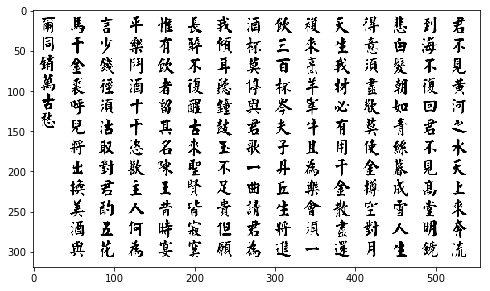

In [45]:
img_writing = cv2.imread('writing.png',0)
plt.figure(figsize=(8,8))
plt.imshow(img_writing,cmap='gray')
plt.show()

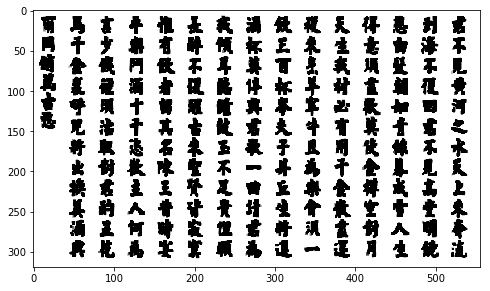

In [56]:
erode_writing = cv2.erode(img_writing,None,iterations=1)
plt.figure(figsize=(8,8))
plt.imshow(erode_writing,cmap='gray')
plt.show()

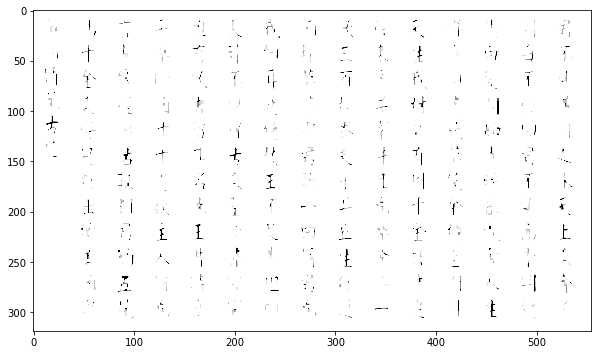

In [54]:
dilate_writing = cv2.dilate(img_writing,None,iterations = 1)
plt.figure(figsize=(10,8))
plt.imshow(dilate_writing,cmap='gray')
plt.show()

## 图片背景变换

In [4]:
img_id = cv2.imread('wa.jpg',1)
cv2.imshow('hwy',img_id)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [58]:
cv2.imshow('hwy',cv2.cvtColor(img_id,cv2.COLOR_BGR2HSV))
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows() 

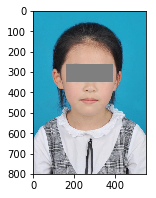

In [59]:
my_show(img_id)

## 学习知乎上关于hsv的介绍和经验来做这个题

In [90]:
blue= np.uint8([[[255,0,0]]])
hsv_blue=cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)
hsv_blue=cv2.cvtColor(blue,cv2.COLOR_BGR2HSV_FULL)
print(hsv_blue)

[[[120 255 255]]]
[[[171 255 255]]]


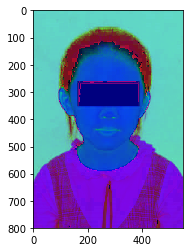

In [7]:
img_hsv = cv2.cvtColor(img_id,cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

In [9]:
def my_hsvshow(hsvimg,size=(8,8)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(hsvimg,cv2.COLOR_HSV2RGB))
    plt.show()   

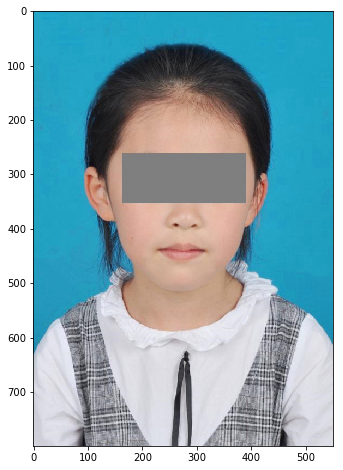

In [10]:
my_hsvshow(img_hsv)

In [23]:
# 敏感度
sensitivity = 15
# 定义蓝色在hsv的范围
lower_blue = np.array([85-sensitivity,100,100])
upper_blue = np.array([85+sensitivity,255,255])
# 这里有个坑，HSV里蓝色H值是240，然后在cv2里H值减半是120，zhihu上代码按120+-来做本来是OK的。
# 但是我选的这个ID照片原始是湖蓝背景，转成hsv后，见上图，可以看到人脸及眼睛遮层变成蓝了，反而背景蓝偏绿了，我们的目的是要把背景换掉，因此
# 用zhihu这个怎么扣都扣的人脸！！！因此找了个colorPicker的工具看了下hsv图里现在这个蓝绿背景的H值，改成85后，背景和人就顺利分开了
mask_blue = cv2.inRange(img_hsv,lower_blue,upper_blue)

# 这一段没看懂，不知道在算什么
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_CLOSE, kernel)  # 闭运算
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)   # 开运算
# print(mask_blue)
# cv2.imshow('image',img_id)
# cv2.imshow('mask_blue',mask_blue)
# if cv2.waitKey(0)==27:
#     cv2.destroyAllWindows()
# 


[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


In [15]:
print(img_hsv[0,0,:])

[ 96 211 197]


In [102]:
cv2.imshow('img', img_id)
hsv = cv2.cvtColor(img_id, cv2.COLOR_BGR2HSV)
cv2.imshow('hsv', hsv[:,:,0])
(thresh, im_bw) = cv2.threshold(hsv[:,:,0], 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imshow('otsu', im_bw)
if cv2.waitKey(0)==27:
    cv2.destroyAllWindows()

In [103]:
import cv2
import numpy as np

path = "wa.jpg"
img = cv2.imread(path)

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

sensitivity = 15

# define range of blue color in HSV
lower_blue = np.array([120-sensitivity,100,100])
upper_blue = np.array([120+sensitivity,255,255])
# Threshold the HSV image to get a range of blue color
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_CLOSE, kernel)  # 闭运算
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)   # 开运算
 
# define range of red color in HSV
lower_red_0, upper_red_0 = np.array([0,100,100]), np.array([sensitivity,255,255])
lower_red_1, upper_red_1 = np.array([180-sensitivity,100,100]), np.array([180,255,255])
# Threshold the HSV image to get a range of red color
mask_0 = cv2.inRange(hsv, lower_red_0, upper_red_0)
mask_1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
mask_red = cv2.bitwise_or(mask_0, mask_1)

mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)


# 合并蓝色mask和红色mask
mask = cv2.bitwise_or(mask_blue, mask_red)
# Bitwise-AND mask
res = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('image',img)
cv2.imshow('mask_blue',mask_blue)
cv2.imshow('mask_red',mask_red)
cv2.imshow('res',res)

if cv2.waitKey(0)==ord('q'):
    cv2.destroyAllWindows()